## HACKATHON
**TEAM: Pragya**


# Business Context
The real estate sector can be very unpredictable and susceptible to a downturn in times of economic crisis. Whenever the economy suffers, the number of stressed assets can become a huge problem for housing finance companies. The bad debt and stressed assets result in a liquidity crunch and impact the banks that are lenders to both developers and property buyers. Timely risk analysis of these accounts can help lenders forecast the number and value of accounts that are at risk of developing into a Bad Debt in near future and eventually help them mitigate the losses.

# About the Data
The data belongs to the billing systems of various societies. These societies could be residential or public. The data has been collected over the years and has been summarised according to the total amount billed versus the total amount generated from the consumers. For each account, there is a label indicating whether an account resulted in a Bad Debt (the account that would be unable to pay the amount).

**The objective is to build a classification model which can predict whether an account is becoming a Bad Debt. This prediction can help to forecast the number (and value) of accounts that are at risk of developing into a Bad Debt.**

Steps:

1. Import all the required libraries to read both train and test csv files.
2. Perform EDA
3. Build a Logistic Regression model to predict Bad Debt.
4. Evaluate model & improve performance.
5.  Predict Bad Debt for test data and make the submission.

Evaluation Criteria: Mean Precision Score

Mean of precision of all the classes = (P1+P2)/2  Here P1 is Precision of  Class 1 and P2 is Precision of Class2.

# Data Dictionary:

There are two files:-
account_train.csv - for training the model
account_test.csv - for prediction and submission

- AccID: An unique id for the account
- CategoryID: An unique id for the category of the society
- Category: Category of society 
- Value: The market value of the particular property (account)
- PropertySize: The size of the property in square meters
- BillingAmt: The total amount payable by the resident to the society management
- AverageBillingAmt: The average amount payable by the resident to the society management
- CollectedAmt: The total amount collected from the resident 
- AverageCollectedAmt: The average amount collected from the resident 
- DebtAmt: The Total Debt that is at 90 days or more
- WriteOffAmt: The Total amount of debt that has been written off
- CollectionRatio: The ratio between the Total amount collected and Total Billing (ie. CollectedAmt/ BillingAmt)
- DebtBillingRatio: The ratio between the Total Debt and Total Billing (ie. (Total Debt + Total Write Off)/Total Billing)
- TotalElectricityBill: The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.
- HasID: The resident has an ID number. 
- Label: 1 = Is considered to be a Bad Debt, 0 = Not considered to be a Bad Debt

# 1. Loading libraries
**Import Necessary Libraries**



In [100]:
import os
import random
import re
import sys

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from sklearn import metrics

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get Logisticmodels
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

#Standarize data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2. Loading and exploring the data
**Load the data**

In [101]:
# Data_train will be used for modelling analysis, hence, we'll split data on training & validation 
data_train = pd.read_csv("account_train_(1).csv")
# Data test is only to predict values for the submission 
data_test = pd.read_csv("account_test_(1).csv")
# Results will be compared according to actual values in data_results
data_results = pd.read_csv("Sample_Submission_File_(2).csv")

trn_df = data_train.copy()
tst_df = data_test.copy()


In [102]:
data_train = trn_df.copy()
data_test = tst_df.copy()

**Data format check**

In [103]:
data_train.sample(n=3, random_state=4)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
1465,2a6f9e17-9835-4627-a604-8be9c1c28674,1,Residential,75000,496,8029,164,5760,230,29959,0,0.72,3.73,3345,1,1
48070,a630682f-f88c-4027-9ac0-0f9c1266c362,1,Residential,1100000,599,27999,384,28005,583,0,0,1.00,0.00,10578,1,0
82184,9bd3cf24-fc19-4370-81b2-f33bb8d4b50e,1,Residential,60000,269,343,5,0,0,276,0,0.00,0.80,0,1,1


In [104]:
data_test.sample(n=3, random_state=4)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
8293,452dca7e-fbac-42a7-9f69-4cf36a6e2fc4,2,Business,750000,1141910,1110,1110,0,0,7776,0,0.00,7.00,0,0
707,fb90c3ed-5ef8-4433-95cf-828d13fee5d8,2,Business,80000,1610,2412,186,1207,302,1017,0,0.50,0.42,0,0
20705,8cec3a16-8729-4960-ae25-935085335de8,1,Residential,0,2461,2274,27,513,256,0,0,0.23,0.00,0,1


**Observations:**
    Data findings for train and test sets:
- Values and property size variables correspond to property. Hence, adjustments are required for train and test sets:
    - Note:replace to nan and median (Jay CODE)
- Negative billing amt accts pay in advanced and a new dummy variable can be added: 
    - if BillingAmt<=0 then FullPayersAccts=1   else FullPayersAccts=0 (Note: 
- Data corrections are needed to obtain positive values in CollectedAmt and AverageCollectedAmt and CollectionRatio:
    - If CollectedAmt <0 then CollectedAmt*(-1) else CollectedAmt (Note:# corrections)
    - If AverageCollectedAmt <0 then AverageCollectedAmt *(-1) else AverageCollectedAmt (Note:# corrections)
     - If CollectionRatio <0 then CollectionRatio *(-1) else CollectionRatio (Note:# corrections)
- Correlation and multicollinearity tests are needed to select both or  one variable for:
    - Billing Amt/AverageBillingAmt (Note: 1st iteration both and 2nd we can choose one)
    - CollectedAmt/AverageCollectedAmt (Note: 1st iteration both and 2nd we can choose one)
- New variable should be created to identify: current, delinquency (90+DPB) and WOFF (210+DPB) accts:
    - If WriteOffAmt>0 then Age=”WOFF”, else if DebtAmt>0 then Age=”Delinq” else Age=“current”


In [105]:
data_train.columns

Index(['AccID', 'CategoryID', 'Category', 'Value', 'PropertySize',
       'BillingAmt', 'AverageBillingAmt', 'CollectedAmt',
       'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt', 'CollectionRatio',
       'DebtBillingRatio', 'TotalElectricityBill', 'HasID', 'Label'],
      dtype='object')

# 3. Processing columns
**Cleaning data: Values adjustments, new variable creation and correction of negative values.**

In [106]:
# Values and property size adjustments
# Jay code 
# Values and property size adjustments
# Jay code 
data_train[['Value', 'PropertySize']] = data_train[['Value', 'PropertySize']].replace(0, np.nan)
data_test[['Value', 'PropertySize']] = data_test[['Value', 'PropertySize']].replace(0, np.nan)

data_train["Value"].fillna(data_train.Value.median(), inplace=True)
data_test["Value"].fillna(data_test.Value.median(), inplace=True)

data_train["PropertySize"].fillna(data_train.PropertySize.median(), inplace=True)
data_test["PropertySize"].fillna(data_test.PropertySize.median(), inplace=True)

In [107]:
#Data corrections for negative values in CollectedAmt & AverageCollectedAmt & CollectionRatio
data_train.CollectedAmt = data_train.CollectedAmt.apply(lambda x: x*-1 if x <0 else x)
data_test.CollectedAmt = data_test.CollectedAmt.apply(lambda x: x*-1 if x <0 else x)
data_train.AverageCollectedAmt = data_train.AverageCollectedAmt.apply(lambda x: x*-1 if x <0 else x)
data_test.AverageCollectedAmt = data_test.AverageCollectedAmt.apply(lambda x: x*-1 if x <0 else x)
data_train.CollectionRatio = data_train.CollectionRatio.apply(lambda x: x*-1 if x <0 else x)
data_test.CollectionRatio = data_test.CollectionRatio.apply(lambda x: x*-1 if x <0 else x)
data_train.DebtBillingRatio = data_train.DebtBillingRatio.apply(lambda x: x*-1 if x <0 else x)
data_test.DebtBillingRatio = data_test.DebtBillingRatio.apply(lambda x: x*-1 if x <0 else x)
#First iteration convert negative to positive
#Second negative values to zeros

In [108]:
#New variable for FullPayerAcct
data_train['FullPayerAcct'] = np.where(data_train['BillingAmt'] <=0, 1,0)
data_test['FullPayerAcct'] = np.where(data_test['BillingAmt'] <=0, 1,0)
# Relook at second iteration

In [109]:
#New variable for Acct Age: current, delinquency or WOFF
data_train['Age'] = np.where(data_train['WriteOffAmt'] >0, 'WOFF',np.where(data_train['DebtAmt'] >0, 'Delin','Current'))
data_test['Age'] = np.where(data_test['WriteOffAmt'] >0, 'WOFF',np.where(data_test['DebtAmt'] >0, 'Delin','Current'))

In [110]:
cols = ['BillingAmt', 'AverageBillingAmt','TotalElectricityBill']
data_train[data_train[cols] < 0] = np.nan
data_test[data_test[cols] < 0] = np.nan

data_train["BillingAmt"].fillna(data_train.BillingAmt.median(), inplace=True)
data_test["BillingAmt"].fillna(data_test.BillingAmt.median(), inplace=True)

data_train["AverageBillingAmt"].fillna(data_train.AverageBillingAmt.median(), inplace=True)
data_test["AverageBillingAmt"].fillna(data_test.AverageBillingAmt.median(), inplace=True)

data_train["TotalElectricityBill"].fillna(data_train.TotalElectricityBill.median(), inplace=True)
data_test["TotalElectricityBill"].fillna(data_test.TotalElectricityBill.median(), inplace=True)


In [111]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,2.245511,2.730572e+00,1.0,1.0,1.00,2.00,13.0
Value,100476.0,719586.143129,3.044810e+06,1.0,45000.0,140000.00,750000.00,421860000.0
PropertySize,100476.0,746875.454049,5.651551e+06,1.0,310.0,600.00,1162.00,270515963.0
BillingAmt,100476.0,11470.305566,1.253373e+05,0.0,832.0,3733.00,8715.00,26133617.0
AverageBillingAmt,100476.0,610.507405,6.400171e+03,0.0,43.0,116.00,281.00,805044.0
CollectedAmt,100476.0,9776.282276,1.201439e+05,0.0,0.0,369.00,7410.25,24371134.0
AverageCollectedAmt,100476.0,2053.310761,3.682439e+04,0.0,0.0,100.00,770.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.00,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.00,0.00,4306605.0
CollectionRatio,100476.0,31.842187,5.556934e+03,0.0,0.0,0.54,1.00,1701912.0


In [112]:
# This functions plots a histogram and a boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observations:** Log() function is required due to large values. Only Ratios, FullPayerAcct and Category ID do not need transformation.
**First iteration without log transformation**
**Second iteration with log transformation consider negative variables:DebtBillingRatio,TotalElectricityBill, AverageBillingAmt, BillingAmt**

In [113]:
# # Lets add a unique id in place of Accid
# data_train['uniAccID'] = data_train.AccID.map(hash)
# data_test['uniAccID'] = data_test.AccID.map(hash)

In [114]:
col_log=['Value', 'PropertySize',
        'CollectedAmt',
       'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt','BillingAmt','TotalElectricityBill','AverageBillingAmt']
for col in col_log:
    data_train[col + "_log"] = np.log(data_train[col]+10)
for col in col_log:
    data_test[col + "_log"] = np.log(data_test[col]+10)
# dropping the original columns
data_train.drop(col_log, axis=1, inplace=True)
data_test.drop(col_log, axis=1, inplace=True)

#### relook at the second iteration


**Second iteration with log transformation consider negative variables:DebtBillingRatio,TotalElectricityBill, AverageBillingAmt, BillingAmt**

**Observations:** 
    - Log transformation has issues with 0 and negative variables

In [115]:
data_train.head(1)

,AccID,CategoryID,Category,CollectionRatio,DebtBillingRatio,HasID,Label,FullPayerAcct,Age,Value_log,PropertySize_log,CollectedAmt_log,AverageCollectedAmt_log,DebtAmt_log,WriteOffAmt_log,BillingAmt_log,TotalElectricityBill_log,AverageBillingAmt_log
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,0.99,0.0,0,0,0,Current,14.799352,6.388561,10.678814,8.378391,2.302585,2.302585,10.685721,2.302585,6.605298


In [116]:
# # Lets keep AccID and uniAccID mapping safe for future usage
# AccID_map_trn = data_train[["AccID", "uniAccID","uniAccID_log"]]
# AccID_map_tst = data_test[["AccID", "uniAccID","uniAccID_log"]]
# AccID_map_trn.head()

In [117]:
#data_train[data_train['PropertySize_log'] < 0].head()

In [118]:
# col_log_an =['Value', 'PropertySize',
#        'BillingAmt', 'AverageBillingAmt', 'CollectedAmt',
#        'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt', 'TotalElectricityBill']
# trn_df['BillingAmt'][trn_df[['BillingAmt'] < 0] and trn_df['Label'] == 0].count()

In [119]:
data_train = data_train [data_train.Category != 'Environmental Management']

In [120]:
data_train.shape

(100474, 18)

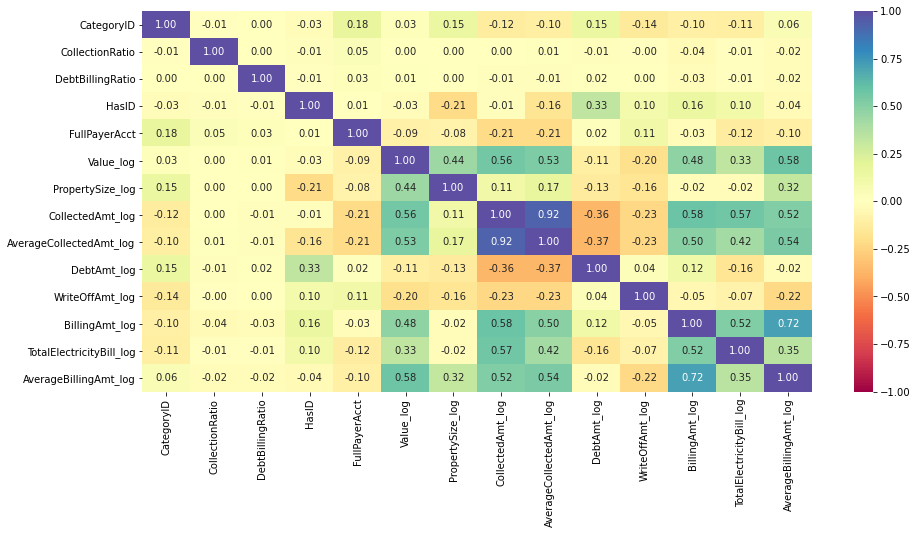

In [121]:
plt.figure(figsize=(15, 7))
sns.heatmap(data_test.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [122]:
data_train = pd.get_dummies(data=data_train, 
                            columns=['Category',
                                     'Age',
#                                      'PropertySizeBin',
#                                      'HasID'
                                     ])


In [123]:
data_test = pd.get_dummies(data=data_test, 
                            columns=['Category',
                                     'Age'
#                                      'PropertySizeBin',
#                                      'HasID'
                                     ])


In [124]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AccID                      33493 non-null  object 
 1   CategoryID                 33493 non-null  int64  
 2   CollectionRatio            33493 non-null  float64
 3   DebtBillingRatio           33493 non-null  float64
 4   HasID                      33493 non-null  int64  
 5   FullPayerAcct              33493 non-null  int32  
 6   Value_log                  33493 non-null  float64
 7   PropertySize_log           33493 non-null  float64
 8   CollectedAmt_log           33493 non-null  float64
 9   AverageCollectedAmt_log    33493 non-null  float64
 10  DebtAmt_log                33493 non-null  float64
 11  WriteOffAmt_log            33493 non-null  float64
 12  BillingAmt_log             33493 non-null  float64
 13  TotalElectricityBill_log   33493 non-null  flo

In [125]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100474 entries, 0 to 100475
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AccID                      100474 non-null  object 
 1   CategoryID                 100474 non-null  int64  
 2   CollectionRatio            100474 non-null  float64
 3   DebtBillingRatio           100474 non-null  float64
 4   HasID                      100474 non-null  int64  
 5   Label                      100474 non-null  int64  
 6   FullPayerAcct              100474 non-null  int32  
 7   Value_log                  100474 non-null  float64
 8   PropertySize_log           100474 non-null  float64
 9   CollectedAmt_log           100474 non-null  float64
 10  AverageCollectedAmt_log    100474 non-null  float64
 11  DebtAmt_log                100474 non-null  float64
 12  WriteOffAmt_log            100474 non-null  float64
 13  BillingAmt_log             10

## Modeling

### Train and Test set creation

In [126]:
data_train_cp = data_train.copy()
data_test_cp = data_test.copy()

In [127]:
data_train.drop(['CategoryID','AccID'], axis=1, inplace=True)
data_test.drop(['CategoryID','AccID'], axis=1, inplace=True)

### Train and Test dataset to calculate P1

In [128]:
X = data_train.drop(["Label"], axis=1)
y = data_train["Label"]

In [129]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100474 entries, 0 to 100475
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CollectionRatio            100474 non-null  float64
 1   DebtBillingRatio           100474 non-null  float64
 2   HasID                      100474 non-null  int64  
 3   FullPayerAcct              100474 non-null  int32  
 4   Value_log                  100474 non-null  float64
 5   PropertySize_log           100474 non-null  float64
 6   CollectedAmt_log           100474 non-null  float64
 7   AverageCollectedAmt_log    100474 non-null  float64
 8   DebtAmt_log                100474 non-null  float64
 9   WriteOffAmt_log            100474 non-null  float64
 10  BillingAmt_log             100474 non-null  float64
 11  TotalElectricityBill_log   100474 non-null  float64
 12  AverageBillingAmt_log      100474 non-null  float64
 13  Category_Agricultural      10

In [130]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [131]:
print("Test Label True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Label False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Test Label True Values        : 13882 (46.05%)
Test Label False Values       : 16261 (53.95%)



In [132]:
print("Train Label True Values        : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Train Label False Values       : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

Train Label True Values        : 32479 (46.18%)
Train Label False Values       : 37852 (53.82%)



## Bagging Classifier Tuned

In [159]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [160]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [161]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Testing against the test sheet
Lets train the data using training datset provided and predict the labels for test dataset

In [166]:
X_train = data_train.drop(["Label"], axis=1)
y_train = data_train["Label"]

In [167]:
X_test = data_test.copy() # Not using train test split function , just taking the test data from provided csv

In [168]:
print("Train Label True Values        : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Train Label False Values       : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

Train Label True Values        : 46361 (46.14%)
Train Label False Values       : 54113 (53.86%)



In [175]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=30,
                  random_state=1)

In [176]:
ny_test = rf_estimator.predict(X_test)

In [177]:
print("Test Label True Values        : {0} ({1:0.2f}%)".format(len(ny_test[ny_test[:] == 1]), (len(ny_test[ny_test[:] == 1])/len(ny_test)) * 100))
print("Test Label False Values       : {0} ({1:0.2f}%)".format(len(ny_test[ny_test[:] == 0]), (len(ny_test[ny_test[:] == 0])/len(ny_test)) * 100))
print("")

Test Label True Values        : 15392 (45.96%)
Test Label False Values       : 18101 (54.04%)



## Now lets export the output

In [178]:
dict = {'AccID': data_test_cp['AccID'], 'Label': ny_test}
df = pd.DataFrame(dict)
df.to_csv('Submission_File_Pragya_gbt.csv', index=False,header=True)